Final Project Submission <br>
Student name: Qilun Chen, Evan Serrano<br>
Student pace: full time<br>
Scheduled project review date/time: April/1/2022<br>
Instructor name: Praveen Gowtham, Joe Comeaux<br>
Blog post URL:https://github.com/nkbuddy/dsc-phase-3-project-NBA

# STEP 1: Define the Problem

# Step 2: Gather the Data

# Step 3: Prepare Data for Consumption

## 3.1 Import Libraries

## 3.11 Load Data Modelling Libraries

## 3.2 Meet and Greet Data

### 3.21 The 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting

### 3.22 Clean Data

### 3.23 Convert Formats

### 3.24 Da-Double Check Cleaned Data

### 3.25 Split Training and Testing Data

# Step 4: Perform Exploratory Analysis with Statistics

# Step 5: Model Data

## 5.1 Evaluate Model Performance

### 5.11 Model Performance with Cross-Validation (CV)

### 5.12 Tune Model with Hyper-Parameters

### 5.13 Tune Model with Feature Selection

# Step 6: Validate and Implement

# Step 7: Optimize and Strategize

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
%matplotlib inline

df = pd.read_csv('shot_logs.csv')
df.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   GAME_ID                     128069 non-null  int64  
 1   MATCHUP                     128069 non-null  object 
 2   LOCATION                    128069 non-null  object 
 3   W                           128069 non-null  object 
 4   FINAL_MARGIN                128069 non-null  int64  
 5   SHOT_NUMBER                 128069 non-null  int64  
 6   PERIOD                      128069 non-null  int64  
 7   GAME_CLOCK                  128069 non-null  object 
 8   SHOT_CLOCK                  122502 non-null  float64
 9   DRIBBLES                    128069 non-null  int64  
 10  TOUCH_TIME                  128069 non-null  float64
 11  SHOT_DIST                   128069 non-null  float64
 12  PTS_TYPE                    128069 non-null  int64  
 13  SHOT_RESULT   

In [147]:
df[['MATCHUP','LOCATION', 'W', 'GAME_CLOCK', 'CLOSEST_DEFENDER', 'player_name']].head()

,MATCHUP,LOCATION,W,GAME_CLOCK,CLOSEST_DEFENDER,player_name
0,"MAR 04, 2015 - CHA @ BKN",A,W,1:09,"Anderson, Alan",brian roberts
1,"MAR 04, 2015 - CHA @ BKN",A,W,0:14,"Bogdanovic, Bojan",brian roberts
2,"MAR 04, 2015 - CHA @ BKN",A,W,0:00,"Bogdanovic, Bojan",brian roberts
3,"MAR 04, 2015 - CHA @ BKN",A,W,11:47,"Brown, Markel",brian roberts
4,"MAR 04, 2015 - CHA @ BKN",A,W,10:34,"Young, Thaddeus",brian roberts


In [148]:
print('columns with null values:\n', df.isnull().sum())

columns with null values:
 GAME_ID                          0
MATCHUP                          0
LOCATION                         0
W                                0
FINAL_MARGIN                     0
SHOT_NUMBER                      0
PERIOD                           0
GAME_CLOCK                       0
SHOT_CLOCK                    5567
DRIBBLES                         0
TOUCH_TIME                       0
SHOT_DIST                        0
PTS_TYPE                         0
SHOT_RESULT                      0
CLOSEST_DEFENDER                 0
CLOSEST_DEFENDER_PLAYER_ID       0
CLOSE_DEF_DIST                   0
FGM                              0
PTS                              0
player_name                      0
player_id                        0
dtype: int64


In [149]:
df.describe(include = 'all')

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
count,1.280690e+05,128069,128069,128069,128069.000000,128069.000000,128069.000000,128069,122502.000000,128069.000000,...,128069.000000,128069.000000,128069,128069,128069.000000,128069.000000,128069.000000,128069.000000,128069,128069.000000
unique,NaN,1808,2,2,NaN,NaN,NaN,719,NaN,NaN,...,NaN,NaN,2,473,NaN,NaN,NaN,NaN,281,NaN
top,NaN,"FEB 07, 2015 - DAL vs. POR",A,W,NaN,NaN,NaN,0:01,NaN,NaN,...,NaN,NaN,missed,"Ibaka, Serge",NaN,NaN,NaN,NaN,james harden,NaN
freq,NaN,105,64135,64595,NaN,NaN,NaN,859,NaN,NaN,...,NaN,NaN,70164,814,NaN,NaN,NaN,NaN,1054,NaN
mean,2.140045e+07,NaN,NaN,NaN,0.208723,6.506899,2.469427,NaN,12.453344,2.023355,...,13.571504,2.264670,NaN,NaN,159038.487284,4.123015,0.452139,0.997314,NaN,157238.251247
std,2.578773e+02,NaN,NaN,NaN,13.233267,4.713260,1.139919,NaN,5.763265,3.477760,...,8.888964,0.441159,NaN,NaN,78791.172947,2.756446,0.497706,1.130978,NaN,79362.389336
min,2.140000e+07,NaN,NaN,NaN,-53.000000,1.000000,1.000000,NaN,0.000000,0.000000,...,0.000000,2.000000,NaN,NaN,708.000000,0.000000,0.000000,0.000000,NaN,708.000000
25%,2.140023e+07,NaN,NaN,NaN,-8.000000,3.000000,1.000000,NaN,8.200000,0.000000,...,4.700000,2.000000,NaN,NaN,101249.000000,2.300000,0.000000,0.000000,NaN,101162.000000
50%,2.140045e+07,NaN,NaN,NaN,1.000000,5.000000,2.000000,NaN,12.300000,1.000000,...,13.700000,2.000000,NaN,NaN,201949.000000,3.700000,0.000000,0.000000,NaN,201939.000000
75%,2.140067e+07,NaN,NaN,NaN,9.000000,9.000000,3.000000,NaN,16.675000,2.000000,...,22.500000,3.000000,NaN,NaN,203079.000000,5.300000,1.000000,2.000000,NaN,202704.000000


In [150]:
df['SHOT_CLOCK'].fillna(0, inplace = True)

In [151]:
#Remove negative touch time, which is impossible
df['TOUCH_TIME'] = df['TOUCH_TIME'].clip(lower=0)

In [152]:
drop_column = ['GAME_ID','MATCHUP', 'W', 'FINAL_MARGIN', 'SHOT_NUMBER','CLOSEST_DEFENDER','CLOSEST_DEFENDER_PLAYER_ID','PTS','player_name','player_id', 'SHOT_RESULT']
df = df.drop(drop_column, axis=1)
print(df.isnull().sum())

LOCATION          0
PERIOD            0
GAME_CLOCK        0
SHOT_CLOCK        0
DRIBBLES          0
TOUCH_TIME        0
SHOT_DIST         0
PTS_TYPE          0
CLOSE_DEF_DIST    0
FGM               0
dtype: int64


In [153]:
df['LOCATION'] = df['LOCATION'].astype('category')
df['LOCATION'] = df['LOCATION'].cat.codes

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LOCATION        128069 non-null  int8   
 1   PERIOD          128069 non-null  int64  
 2   GAME_CLOCK      128069 non-null  object 
 3   SHOT_CLOCK      128069 non-null  float64
 4   DRIBBLES        128069 non-null  int64  
 5   TOUCH_TIME      128069 non-null  float64
 6   SHOT_DIST       128069 non-null  float64
 7   PTS_TYPE        128069 non-null  int64  
 8   CLOSE_DEF_DIST  128069 non-null  float64
 9   FGM             128069 non-null  int64  
dtypes: float64(4), int64(4), int8(1), object(1)
memory usage: 8.9+ MB


In [155]:
df.head()

,LOCATION,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST,FGM
0,0,1,1:09,10.8,2,1.9,7.7,2,1.3,1
1,0,1,0:14,3.4,0,0.8,28.2,3,6.1,0
2,0,1,0:00,0.0,3,2.7,10.1,2,0.9,0
3,0,2,11:47,10.3,2,1.9,17.2,2,3.4,0
4,0,2,10:34,10.9,2,2.7,3.7,2,1.1,0


In [156]:
df['GAME_CLOCK']

0          1:09
1          0:14
2          0:00
3         11:47
4         10:34
          ...  
128064     1:52
128065    11:28
128066    11:10
128067     2:37
128068     0:12
Name: GAME_CLOCK, Length: 128069, dtype: object

In [157]:
#FEATURE ENGINEERING: CONVERT GAME CLOCK TO TIME ELAPSED IN SECS 
import datetime
df['TIME_ELAPSED_SECS'] = pd.to_datetime(df['GAME_CLOCK'], format='%M:%S')
df['TIME_ELAPSED_SECS']


0        1900-01-01 00:01:09
1        1900-01-01 00:00:14
2        1900-01-01 00:00:00
3        1900-01-01 00:11:47
4        1900-01-01 00:10:34
                 ...        
128064   1900-01-01 00:01:52
128065   1900-01-01 00:11:28
128066   1900-01-01 00:11:10
128067   1900-01-01 00:02:37
128068   1900-01-01 00:00:12
Name: TIME_ELAPSED_SECS, Length: 128069, dtype: datetime64[ns]

In [158]:
df['TIME_ELAPSED_SECS'] = df['TIME_ELAPSED_SECS'].dt.hour * 3600 + df['TIME_ELAPSED_SECS'].dt.minute * 60 + df['TIME_ELAPSED_SECS'].dt.second
df['TIME_ELAPSED_SECS']

0          69
1          14
2           0
3         707
4         634
         ... 
128064    112
128065    688
128066    670
128067    157
128068     12
Name: TIME_ELAPSED_SECS, Length: 128069, dtype: int64

In [159]:
df['TIME_ELAPSED_SECONDS'] = (720 * df['PERIOD']) - df['TIME_ELAPSED_SECS']
df['TIME_ELAPSED_SECONDS']

0          651
1          706
2          720
3          733
4          806
          ... 
128064    2048
128065    2192
128066    2210
128067    2723
128068    2868
Name: TIME_ELAPSED_SECONDS, Length: 128069, dtype: int64

In [160]:
df = df.drop(['TIME_ELAPSED_SECS'], axis=1)

In [161]:
#
df = df.drop(['GAME_CLOCK'], axis=1)

In [162]:
print('columns with null values: \n', df.isnull().sum())
print("-"*10)
print (df.info())
print("-"*10)

df.describe(include = 'all')

columns with null values: 
 LOCATION                0
PERIOD                  0
SHOT_CLOCK              0
DRIBBLES                0
TOUCH_TIME              0
SHOT_DIST               0
PTS_TYPE                0
CLOSE_DEF_DIST          0
FGM                     0
TIME_ELAPSED_SECONDS    0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   LOCATION              128069 non-null  int8   
 1   PERIOD                128069 non-null  int64  
 2   SHOT_CLOCK            128069 non-null  float64
 3   DRIBBLES              128069 non-null  int64  
 4   TOUCH_TIME            128069 non-null  float64
 5   SHOT_DIST             128069 non-null  float64
 6   PTS_TYPE              128069 non-null  int64  
 7   CLOSE_DEF_DIST        128069 non-null  float64
 8   FGM                   128069 non-null  int64  
 9   

,LOCATION,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST,FGM,TIME_ELAPSED_SECONDS
count,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,0.499215,2.469427,11.912012,2.023355,2.771957,13.571504,2.264670,4.123015,0.452139,1426.593368
std,0.500001,1.139919,6.182215,3.477760,2.986698,8.888964,0.441159,2.756446,0.497706,852.012671
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,3.000000
25%,0.000000,1.000000,7.500000,0.000000,0.900000,4.700000,2.000000,2.300000,0.000000,685.000000
50%,0.000000,2.000000,12.000000,1.000000,1.600000,13.700000,2.000000,3.700000,0.000000,1412.000000
75%,1.000000,3.000000,16.400000,2.000000,3.700000,22.500000,3.000000,5.300000,1.000000,2127.000000
max,1.000000,7.000000,24.000000,32.000000,24.900000,47.200000,3.000000,53.200000,1.000000,5037.000000


In [163]:
df.corr()

,LOCATION,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST,FGM,TIME_ELAPSED_SECONDS
LOCATION,1.000000,0.003064,0.008218,-0.014873,-0.013060,-0.001589,0.005012,0.003579,0.008093,0.002541
PERIOD,0.003064,1.000000,-0.042679,0.055301,0.046665,0.030080,0.048915,-0.010204,-0.014082,0.969886
SHOT_CLOCK,0.008218,-0.042679,1.000000,-0.091300,-0.141637,-0.180039,-0.056575,0.022725,0.101981,-0.067484
DRIBBLES,-0.014873,0.055301,-0.091300,1.000000,0.930576,-0.082540,-0.169016,-0.153674,-0.034390,0.081581
TOUCH_TIME,-0.013060,0.046665,-0.141637,0.930576,1.000000,-0.085979,-0.184503,-0.166664,-0.047352,0.070433
SHOT_DIST,-0.001589,0.030080,-0.180039,-0.082540,-0.085979,1.000000,0.740933,0.523192,-0.191704,0.034271
PTS_TYPE,0.005012,0.048915,-0.056575,-0.169016,-0.184503,0.740933,1.000000,0.414198,-0.121293,0.058931
CLOSE_DEF_DIST,0.003579,-0.010204,0.022725,-0.153674,-0.166664,0.523192,0.414198,1.000000,-0.001074,-0.011646
FGM,0.008093,-0.014082,0.101981,-0.034390,-0.047352,-0.191704,-0.121293,-0.001074,1.000000,-0.016361
TIME_ELAPSED_SECONDS,0.002541,0.969886,-0.067484,0.081581,0.070433,0.034271,0.058931,-0.011646,-0.016361,1.000000


<AxesSubplot:>

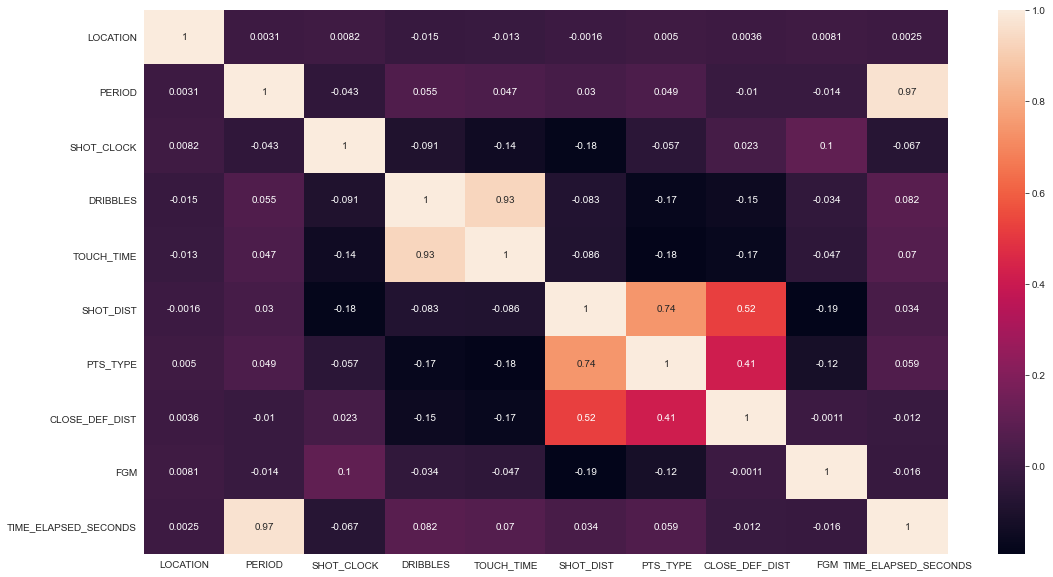

In [164]:
plt.figure(figsize=(18, 10))
sns.heatmap(df.corr(), annot=True)

In [165]:
#WE CAN DROP PERIOD COLUMN AS TIME_ELAPSED HAS ALL THE DATA NEEDED 
df = df.drop(['PERIOD'], axis=1)

In [166]:
df

,LOCATION,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST,FGM,TIME_ELAPSED_SECONDS
0,0,10.8,2,1.9,7.7,2,1.3,1,651
1,0,3.4,0,0.8,28.2,3,6.1,0,706
2,0,0.0,3,2.7,10.1,2,0.9,0,720
3,0,10.3,2,1.9,17.2,2,3.4,0,733
4,0,10.9,2,2.7,3.7,2,1.1,0,806
...,...,...,...,...,...,...,...,...,...
128064,0,18.3,5,6.2,8.7,2,0.8,0,2048
128065,0,19.8,4,5.2,0.6,2,0.6,1,2192
128066,0,23.0,2,4.2,16.9,2,4.2,1,2210
128067,0,9.1,4,4.5,18.3,2,3.0,0,2723
